In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [85]:
from scipy.spatial import ConvexHull

In [86]:
points = np.random.rand(60, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

In [87]:
%run helper.ipynb

In [88]:
indecies = hull.vertices.tolist()

In [89]:
hull_verticies = [tuple(points[i]) for i in indecies]

Algorithm

1. Pick vertex (first)
1. Pick an edge before (last, first)
1. Find the farthest vertex (name it start)
1. Pick next edge after (first, second)
1. from start find farthest vertex (name it end)
1. from start till end pick longest diameter
1. pick next vertex. start = end
1. go to 5



In [90]:
def distance(A, B):
    return (B[0] - A[0]) ** 2 + (B[1] - A[1]) ** 2

In [91]:
def find_longest_diameter(vertices, point_start, range_start, range_end):
    A = vertices[point_start]
    diameter = 0
    point_end = point_start
    for i in range(range_start, range_end + 1):
        B = vertices[i]
        current_distance = distance(A, B)
        if current_distance > diameter:
            diameter = current_distance
            point_end = i
    return point_end, diameter

In [92]:
def find_farthest_vertext(verticies, edgeA, edgeB, start_from, det):
    start = start_from
    for i in range(start_from, len(verticies)-1):        
        newd = where_is_dot(verticies[i], edgeA, edgeB)
        if newd > det:
            det = newd
            start = i
        else:
            break
    return start, det

In [93]:
def find_diameter(verticies):
    fix_index = 0
    edgeA, edgeB = verticies[-1], verticies[fix_index]
    start, d = find_farthest_vertext(verticies, edgeA, edgeB, 1, 0)
    end = start
    diameter_start = 0
    diameter_end = 0
    diameter_value = 0
    while fix_index < len(verticies) - 1:
        start=end

        endd = where_is_dot(verticies[start], edgeA, edgeB)
        end, endd = find_farthest_vertext(verticies, edgeA, edgeB, start, endd)
        current_end, current_diameter = find_longest_diameter(verticies, fix_index, start, end)
        if current_diameter > diameter_value:
            diameter_end = current_end
            diameter_start = fix_index
            diameter_value = current_diameter
        fix_index += 1
        edgeA = edgeB    
        edgeB = verticies[fix_index]

    return (verticies[diameter_start], verticies[diameter_end])

In [94]:
vs, ve = find_diameter(hull_verticies)

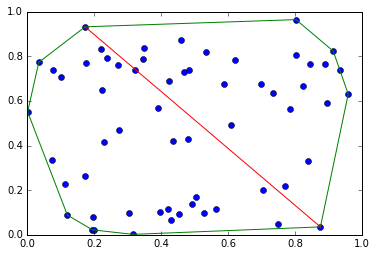

In [95]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'g')
plt.plot((vs[0], ve[0]), (vs[1], ve[1]), 'r')

In [83]:
plt.show()